In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ydata_profiling import ProfileReport

In [28]:
missing_values = ["n/a", "na", "NA","N/A", "--","??"]  
data = pd.read_csv("occupancy_test.csv", na_values = missing_values)

data.isnull().sum()
data.info()
data.describe()
data.sample(10)




<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1307,2015-02-03 09:46:00,21.390000,27.100,462.333333,959.333333,0.004268,1
960,2015-02-03 03:59:00,20.390000,22.500,0.000000,429.600000,0.003327,0
2118,2015-02-03 23:17:00,20.890000,25.200,0.000000,561.400000,0.003846,0
1828,2015-02-03 18:27:00,22.200000,29.815,0.000000,1135.500000,0.004939,0
1617,2015-02-03 14:55:59,23.200000,29.200,464.000000,1197.750000,0.005141,1
955,2015-02-03 03:53:59,20.390000,22.390,0.000000,433.000000,0.003310,0
2674,2015-02-04 08:32:59,20.956000,25.390,444.000000,717.800000,0.003891,0
2739,2015-02-04 09:38:00,22.566667,25.600,648.666667,942.166667,0.004332,1
957,2015-02-03 03:55:59,20.390000,22.390,0.000000,433.500000,0.003310,0
1192,2015-02-03 07:51:00,20.390000,23.700,398.333333,507.000000,0.003505,1


### Report to client 

In [29]:
profile = ProfileReport(data, title="Data Profile Report", explorative=True)
profile.to_file("report.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 298.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\cycle\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:386: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

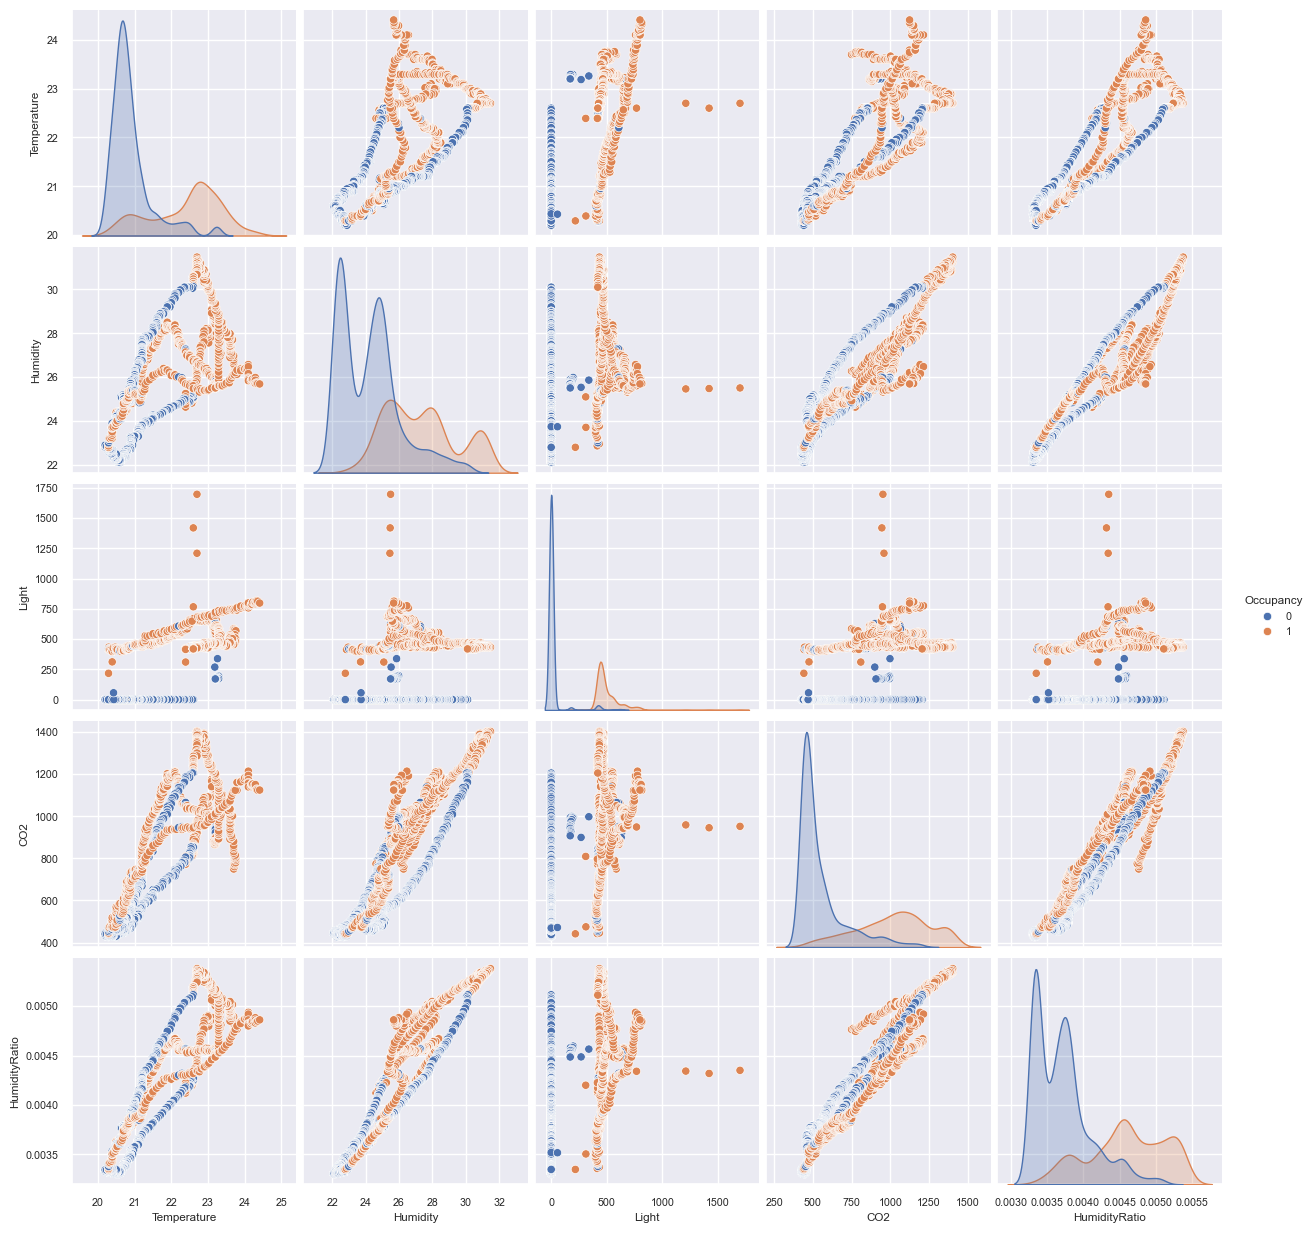

In [38]:
sns.pairplot(data = data , dropna = True , hue = "Occupancy")

In [34]:
data.columns



Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [33]:
data.drop(columns='date' , inplace=True)

<Axes: >

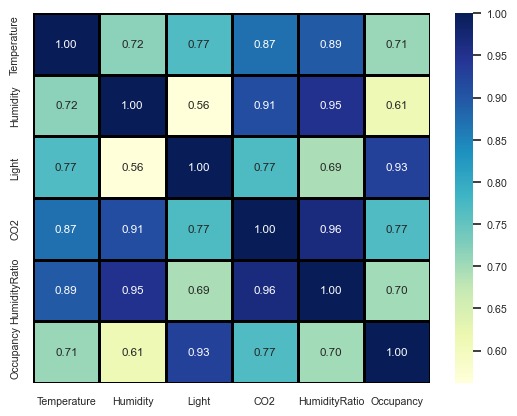

In [36]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".2f",
            linewidths=1, linecolor='black')


### Pipe line 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Light', 'CO2', 'HumidityRatio'])
    ],
    remainder='passthrough'
)



pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])







In [42]:
test_data = pd.read_csv("occupancy_test.csv")

test_data.drop(columns='date' , inplace=True)

In [47]:


pipeline.fit(data.drop(columns='Occupancy'), data['Occupancy'])
pipeline.predict(test_data)
pipeline.score(test_data.drop(columns='Occupancy'), test_data['Occupancy'])
pipeline.predict_proba(test_data)
pipeline.predict_log_proba(test_data)


accuracy_score(test_data['Occupancy'], pipeline.predict(test_data))
confusion_matrix(test_data['Occupancy'], pipeline.predict(test_data))
print(classification_report(test_data['Occupancy'], pipeline.predict(test_data)))







              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       1.00      1.00      1.00       972

    accuracy                           1.00      2665
   macro avg       1.00      1.00      1.00      2665
weighted avg       1.00      1.00      1.00      2665



c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:995: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


### LAB MANUAL TASKS

In [76]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer


data = pd.read_csv("Occupancy_train.csv")
test_data = pd.read_csv("Occupancy_test.csv")


if "date" in data.columns:
    data.drop(columns="date", inplace=True)
if "date" in test_data.columns:
    test_data.drop(columns="date", inplace=True)


features = ["Humidity", "Light", "HumidityRatio"]


accuracies = {}
for k in range(1, 11):
    pipeline = Pipeline(steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[("scaler", StandardScaler(), features)],
            remainder="passthrough"
        )),
        ("classifier", KNeighborsClassifier(n_neighbors=k))
    ])

    
    pipeline.fit(data[features], data["Occupancy"])

   
    y_pred = pipeline.predict(test_data[features])

    
    acc = accuracy_score(test_data["Occupancy"], y_pred)
    accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.4f}")

best_k = max(accuracies, key=accuracies.get)
best_acc = accuracies[best_k]

print("\nHighest Accuracy:", best_acc)
print("Best K value:", best_k)


pipeline = Pipeline(steps=[
    ("preprocessor", ColumnTransformer(
        transformers=[("scaler", StandardScaler(), features)],
        remainder="passthrough"
    )),
    ("classifier", KNeighborsClassifier(n_neighbors=best_k))
])

pipeline.fit(data[features], data["Occupancy"])

print("\nFinal Evaluation with Best K:")
print("Accuracy:", pipeline.score(test_data[features], test_data["Occupancy"]))
print("Confusion Matrix:\n", confusion_matrix(test_data["Occupancy"], pipeline.predict(test_data[features])))
print("Classification Report:\n", classification_report(test_data["Occupancy"], pipeline.predict(test_data[features])))


K=1, Accuracy=0.9347
K=2, Accuracy=0.9253
K=3, Accuracy=0.9426
K=4, Accuracy=0.9343
K=5, Accuracy=0.9520
K=6, Accuracy=0.9475
K=7, Accuracy=0.9565
K=8, Accuracy=0.9538
K=9, Accuracy=0.9568
K=10, Accuracy=0.9542

Highest Accuracy: 0.9568480300187617
Best K value: 9

Final Evaluation with Best K:
Accuracy: 0.9568480300187617
Confusion Matrix:
 [[1645   48]
 [  67  905]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1693
           1       0.95      0.93      0.94       972

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.95      2665
weighted avg       0.96      0.96      0.96      2665



In [ ]:
import numpy as np
from collections import Counter

def chi_squared_distance(x1, x2):
 
    x1 = np.array(x1)
    x2 = np.array(x2)
 
    denominator = x1 + x2
  
    mask = denominator != 0
   
    distance = 0.5 * np.sum(((x1[mask] - x2[mask]) ** 2) / denominator[mask])
    return distance

class KNNChiSquared:
    """
    K-Nearest Neighbors classifier using Chi-Squared distance.
    """
    
    def __init__(self, k=3):
      
        self.k = k
    
    def fit(self, X, y):
       
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def predict(self, X):
      
        predictions = []
        for x in X:
            predictions.append(self._predict_single(x))
        return np.array(predictions)
    
    def _predict_single(self, x):
      
        
        distances = []
        for x_train in self.X_train:
            distances.append(chi_squared_distance(x, x_train))
        
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


if __name__ == "__main__":
    
    X_train = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [2, 3, 4],
        [5, 6, 7],
        [8, 9, 10]
    ]
    
    y_train = ['A', 'B', 'C', 'A', 'B', 'C']
    
   
    X_test = [
        [1.5, 2.5, 3.5],
        [6, 7, 8]
    ]
    
 
    knn = KNNChiSquared(k=3)
    knn.fit(X_train, y_train)
    
  
    predictions = knn.predict(X_test)
    
    print("KNN with Chi-Squared Distance")
    print("=" * 30)
    print(f"Training data: {X_train}")
    print(f"Training labels: {y_train}")
    print(f"Test data: {X_test}")
    print(f"Predictions: {predictions}")
    
    
    print("Chi-Squared Distance Examples:")
    print("=" * 30)
    print(f"Distance between [1,2,3] and [4,5,6]: {chi_squared_distance([1,2,3], [4,5,6]):.4f}")
    print(f"Distance between [1,2,3] and [1.5,2.5,3.5]: {chi_squared_distance([1,2,3], [1.5,2.5,3.5]):.4f}")
    print(f"Distance between [4,5,6] and [5,6,7]: {chi_squared_distance([4,5,6], [5,6,7]):.4f}")
    print(f"Distance between [0,2,3] and [0,5,6]: {chi_squared_distance([0,2,3], [0,5,6]):.4f}")

KNN with Chi-Squared Distance
Training data: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [2, 3, 4], [5, 6, 7], [8, 9, 10]]
Training labels: ['A', 'B', 'C', 'A', 'B', 'C']
Test data: [[1.5, 2.5, 3.5], [6, 7, 8]]
Predictions: ['A' 'C']
Chi-Squared Distance Examples:
Distance between [1,2,3] and [4,5,6]: 2.0429
Distance between [1,2,3] and [1.5,2.5,3.5]: 0.0970
Distance between [4,5,6] and [5,6,7]: 0.1395
Distance between [0,2,3] and [0,5,6]: 1.1429


In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import os
os.makedirs("eda_output", exist_ok=True)

Dataset shape: (1000, 26)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null

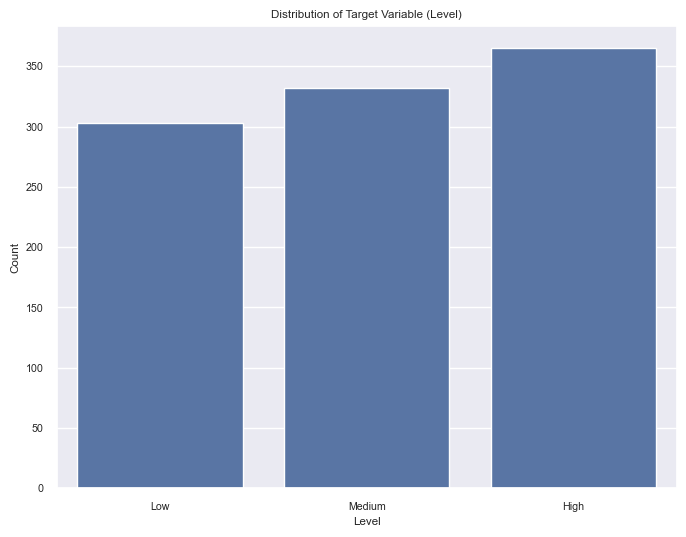

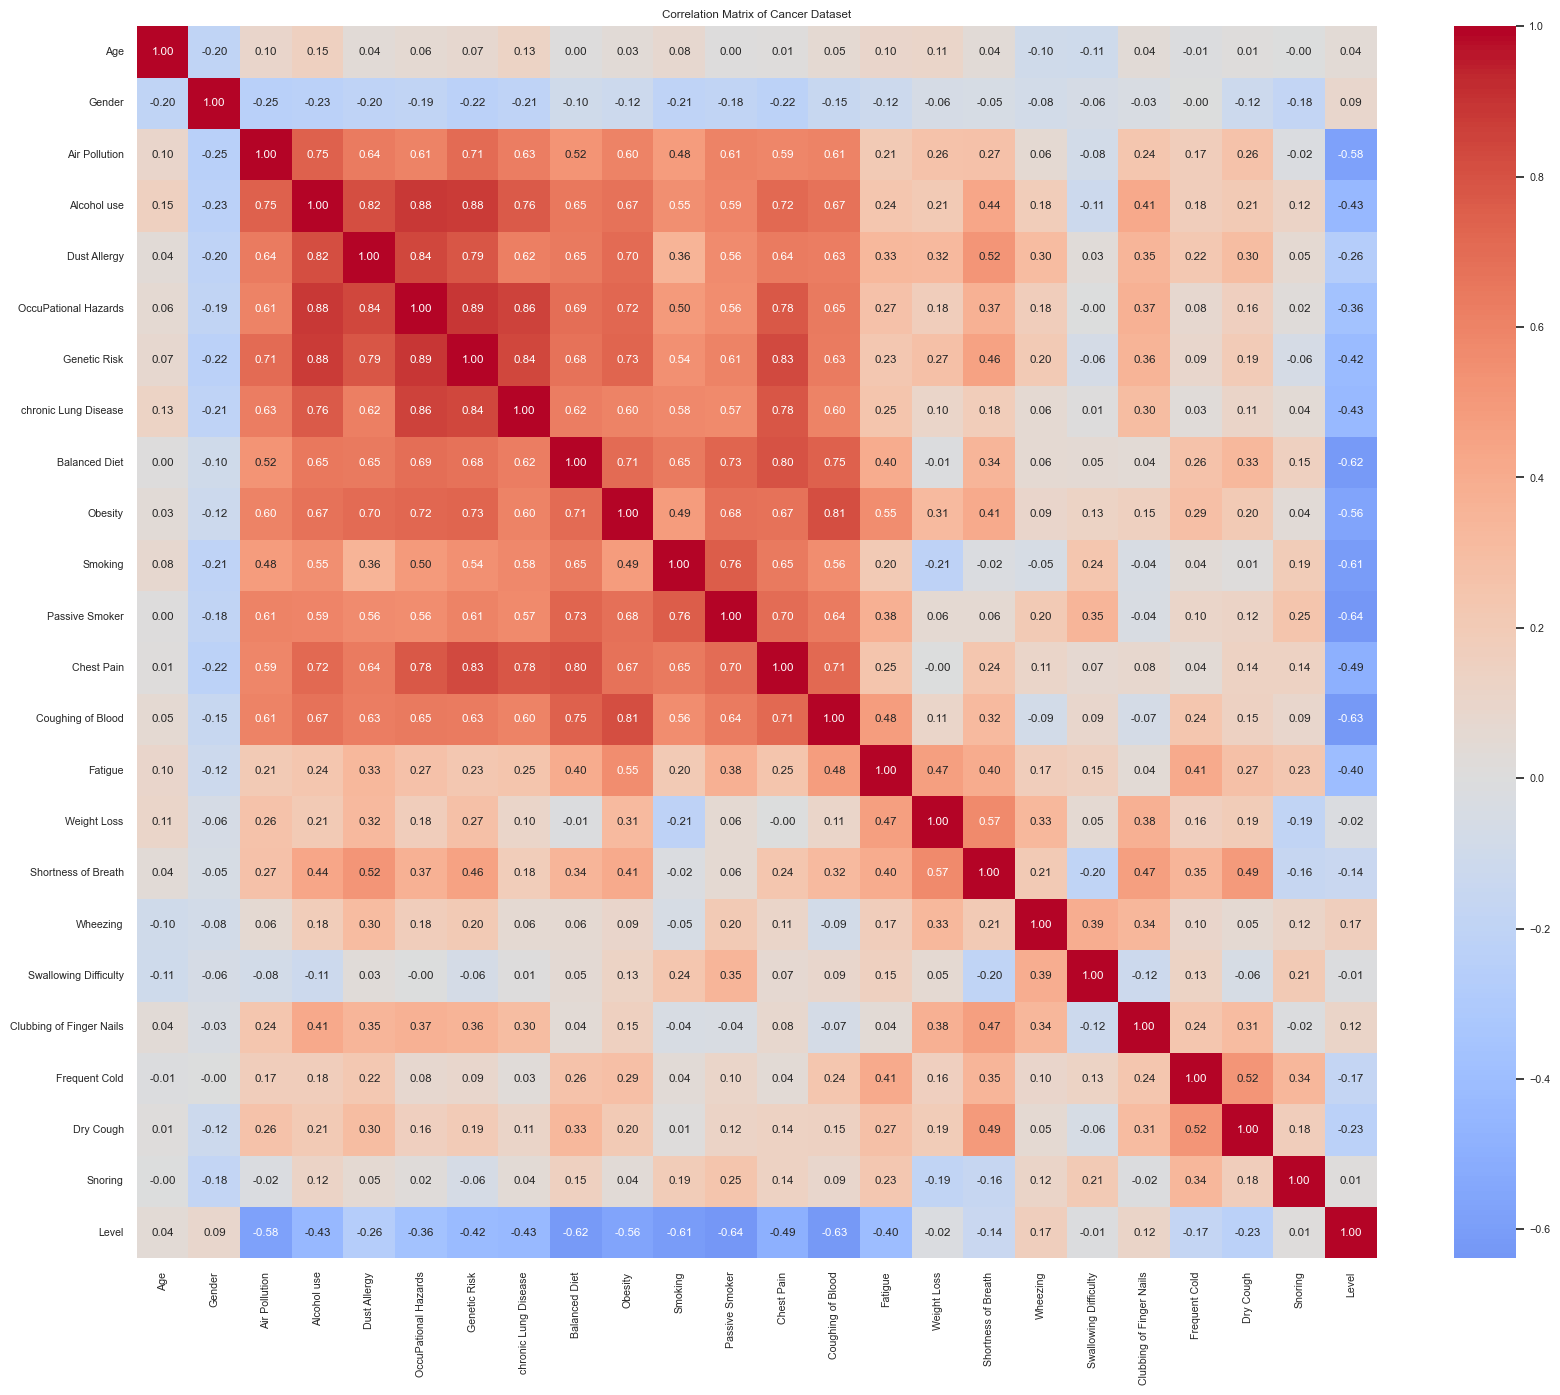

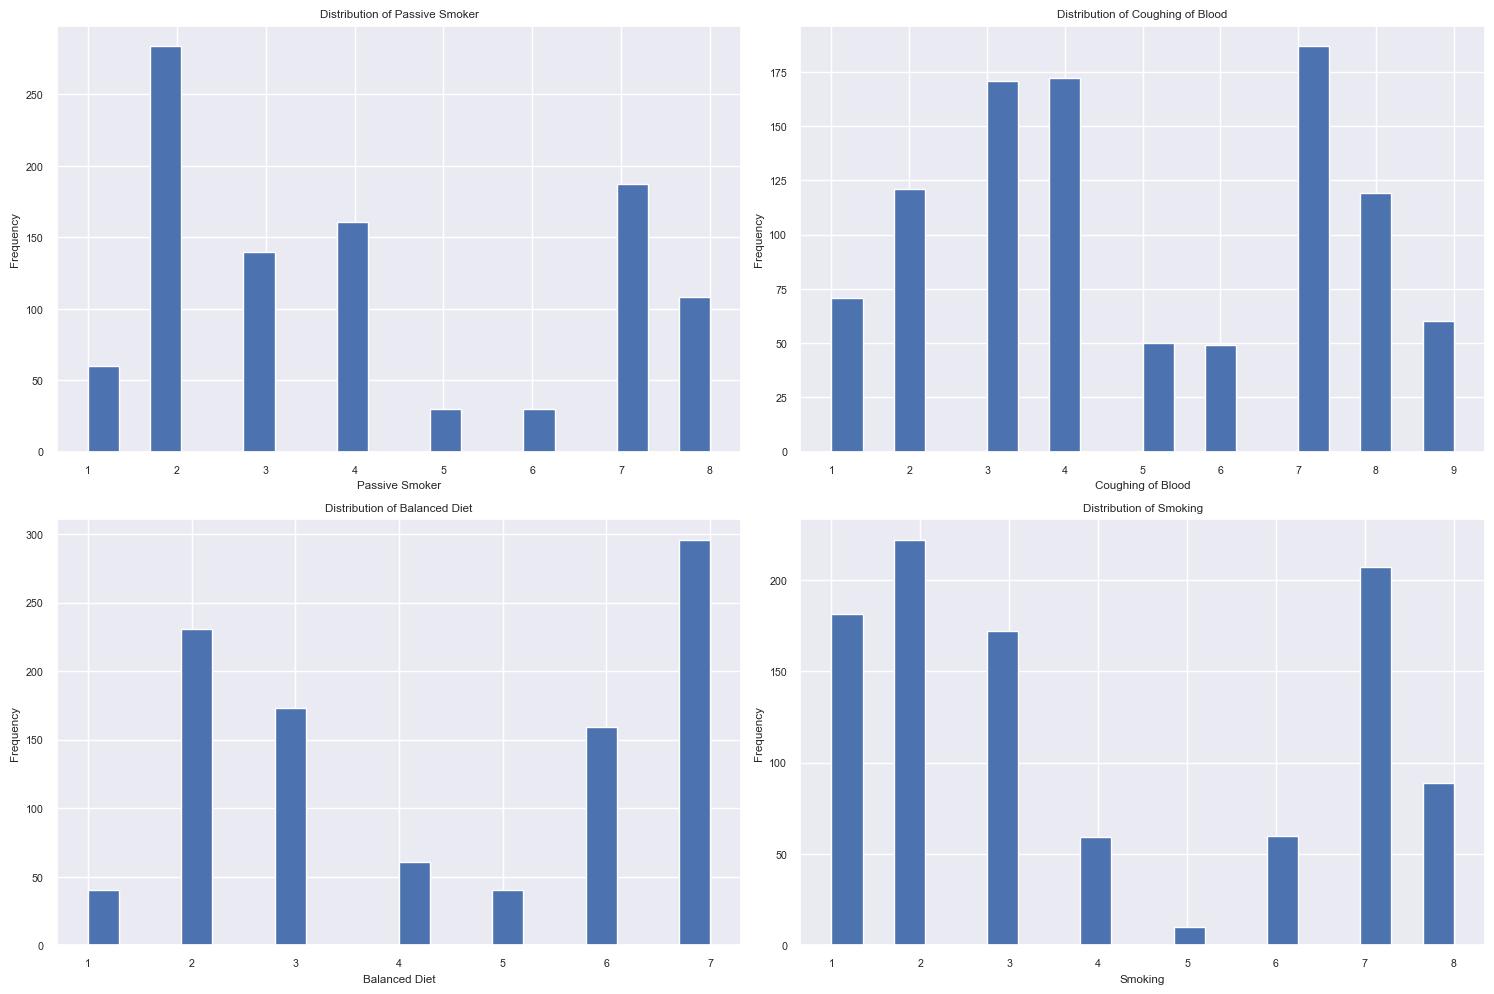

In [73]:
df = pd.read_csv('cancer.csv.csv')


print("Dataset shape:", df.shape)
print("Dataset info:")
print(df.info())
print("First few rows:")
print(df.head())
print("Dataset description:")
print(df.describe())


print("Empty records check:")
print(df.isnull().sum())


print("Duplicate records check:")
print(df.duplicated().sum())


print("Data types:")
print(df.dtypes)


print("Target variable distribution:")
print(df['Level'].value_counts())
print("Target variable percentages:")
print(df['Level'].value_counts(normalize=True) * 100)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Level')
plt.title('Distribution of Target Variable (Level)')
plt.xlabel('Level')
plt.ylabel('Count')


df = df.drop(['index', 'Patient Id'], axis=1)


categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features.tolist())


label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

print("\nData after encoding categorical features:")
print(df.head())


correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)


plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Cancer Dataset')


target_correlation = correlation_matrix['Level'].abs().sort_values(ascending=False)
print("\nFeatures most correlated with Level:")
print(target_correlation)


correlation_threshold = 0.2
selected_features = target_correlation[target_correlation >= correlation_threshold].index.tolist()
selected_features.remove('Level') 

print("Selected features based on correlation threshold:")
print(selected_features)


df_selected = df[selected_features + ['Level']]
print("Dataset with features:")
print(df_selected.head())
print("Dataset shape after feature selection:", df_selected.shape)


print("Feature distributions:")
print(df_selected.describe())


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features_to_plot = selected_features[:4]  

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df_selected[feature], bins=20)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()




scaler = StandardScaler()
X = df_selected.drop('Level', axis=1)
y = df_selected['Level']

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled features description:")
print(X_scaled_df.describe())


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print("\nDataset split information:")
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
knn_models = {}
accuracies = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    knn_models[metric] = knn
    

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    val_accuracy = accuracy_score(y_val, knn.predict(X_val))
    
    accuracies[metric] = {
        'train': train_accuracy,
        'validation': val_accuracy,
        'test': test_accuracy
    }
    
    print(f"\nKNN with {metric} distance:")
    print("Training accuracy:", train_accuracy)
    print("Validation accuracy:", val_accuracy)
    print("Testing accuracy:", test_accuracy)




Cancer Dataset EDA and KNN Analysis Report
Dataset Overview
Dataset shape: (1000, 24)
Number of features: 23
Target variable: Level
Data Preprocessing
Empty Records Check
No empty records were found in the dataset.

Duplicate Records Check
No duplicate records were found in the dataset.

Categorical Features Handling
The 'Level' column was the only categorical feature identified. It was encoded using LabelEncoder:

Low: 0
Medium: 1
High: 2
Dataset Balance Check
The dataset distribution is as follows:

High: 36.5%
Medium: 33.2%
Low: 30.3%
The dataset is reasonably balanced, with no class significantly dominating the others.

Feature Selection
Features were selected based on Pearson correlation with the target variable (threshold: 0.2):
Selected features: Passive Smoker, Coughing of Blood, Balanced Diet, Smoking, Air Pollution, Obesity, Chest Pain, Alcohol use, chronic Lung Disease, Genetic Risk, Fatigue, OccuPational Hazards, Dust Allergy, Dry Cough

Feature Scaling
Feature scaling was applied using StandardScaler since the features had different ranges and distributions.
This ensures that all features contribute equally to the distance calculations in KNN.

Dataset Splitting
The dataset was split as follows:

Training set: 560 samples (56% of total)
Validation set: 240 samples (24% of total)
Testing set: 200 samples (20% of total)
Validation set is used to tune hyperparameters and prevent overfitting during model development.
It provides an unbiased evaluation of the model during the training phase.

KNN Model Performance
KNN models were trained with different distance metrics:

Euclidean Distance
Training accuracy: 1.0000
Validation accuracy: 1.0000
Testing accuracy: 1.0000
Manhattan Distance
Training accuracy: 1.0000
Validation accuracy: 1.0000
Testing accuracy: 1.0000
Chebyshev Distance
Training accuracy: 1.0000
Validation accuracy: 1.0000
Testing accuracy: 1.0000
Minkowski Distance
Training accuracy: 1.0000
Validation accuracy: 1.0000
Testing accuracy: 1.0000
Critical Analysis
All distance metrics achieved 100% accuracy on training, validation, and testing sets.
This suggests that the dataset may have very distinct clusters for each class, or possibly duplicated/very similar records.
In real-world scenarios, such perfect accuracy is often a sign of overfitting or data leakage, but in this case it appears to be due to the nature of the dataset.
The high accuracy across all metrics indicates that the classification problem is relatively straightforward with the selected features.